## metoda eliminacji gaussa float64

In [76]:
function Gaussian_elemination(A, b, dtype = Float64)
    # show(stdout, "text/plain", A)
    # println()
    n = length(b)
    A_b = dtype[A b] # hcat(A,b) 
    @time begin
        for i in 2:n
            curr_row = A_b[i-1, :]
            curr_head = A_b[i-1, i-1]
            for j in i:n
                A_b[j, :] -= ((A_b[j,i-1] / curr_head) * curr_row)
            end
        end
        for i in (n-1):-1:1
            curr_row = A_b[i+1, :]
            curr_head = A_b[i+1, i+1]
            for j in i:-1:1
                A_b[j, :] -= ((A_b[j,i+1] / curr_head) * curr_row)
            end
        end
        x = [A_b[i,n+1]/A_b[i,i] for i in 1:n]
    end
    return x
end

# show(stdout, "text/plain", zeros(2,2))
Gaussian_elemination([1 2 3;
                      3 4 5;
                      1 5 3], [1, 1, 1])

  0.154812 seconds (3.47 k allocations: 152.422 KiB, 99.95% compilation time)


3-element Vector{Float64}:
 -0.5
 -0.0
  0.5

## podane dane wejsciowe

In [108]:
using LinearAlgebra

function create_task_1(n::Int, dtype::DataType)
    A = dtype[i == 1 ? 1 : 1/(i+j-1) for i in 1:n, j in 1:n]
    x = dtype[rand(Int) > 0 ? 1 : -1 for _ in 1:n]
    b = dtype[x ⋅ A[i,:] for i in 1:n]
    return A, x, b
end

function create_task_2(n::Int, dtype::DataType)
    A = dtype[j >= i ? 2i/j : 2j/i for i in 1:n, j in 1:n]
    x = dtype[rand(Int) > 0 ? 1 : -1 for _ in 1:n]
    b = dtype[x ⋅ A[i,:] for i in 1:n]
    return A, x, b
end

A, x, b = create_task_1(5, Float32)
Gaussian_elemination(A, b, Float32)

  0.000037 seconds (168 allocations: 7.000 KiB)


5-element Vector{Float32}:
 1.0001199
 0.99895966
 1.0028912
 0.99682206
 1.0012164

## Testy

In [113]:
function mse(A, B)
    n = length(A)
    s = 0
    for i in 1:n
        s += (A[i] - B[i])^2
    end
    return sqrt(s)
end

function test_equation_resolving(N, dtype = Float64, task_creation=create_task_2)
    for n in N
        println("n = $n")
        A, x, b = task_creation(n, dtype)
        println("uwarunkowanie macierzy: $(cond(A))")
        print("czas obliczania układu: ")
        res = Gaussian_elemination(A, b)
        # print("spodziewany wynik: ")
        # println(x)
        # print("obliczony wynik: ")
        # println(res)
        print("błąd maksymalny: ")
        println(maximum(map(abs, x - res)))
        print("bład średniokwadratowy: ")
        println(mse(x, res))
        println()
        println()
        println()
    end
end

N = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100,200,300,400,500,1000]
function test_func1_func2(dtype = Float64)
    println("Zad 1")
    test_equation_resolving(3:20, dtype, create_task_1)

    println("Zad 2")
    test_equation_resolving(N, dtype, create_task_2)
end

test_func1_func2()

Zad 1
n = 3
uwarunkowanie macierzy: 482.92214086344285
czas obliczania układu:   0.000015 seconds (58 allocations: 2.750 KiB)
błąd maksymalny: 4.6629367034256575e-15
bład średniokwadratowy: 5.883134557068357e-15



n = 4
uwarunkowanie macierzy: 17032.90060334975
czas obliczania układu:   0.000016 seconds (106 allocations: 5.078 KiB)
błąd maksymalny: 1.199040866595169e-13
bład średniokwadratowy: 1.4596236839109163e-13



n = 5
uwarunkowanie macierzy: 591877.1218395197
czas obliczania układu:   0.000012 seconds (168 allocations: 9.141 KiB)
błąd maksymalny: 2.8415048092256256e-12
bład średniokwadratowy: 4.015472052495288e-12



n = 6
uwarunkowanie macierzy: 2.0378509975024078e7
czas obliczania układu:   0.000014 seconds (244 allocations: 13.344 KiB)
błąd maksymalny: 2.1512347458951808e-10
bład średniokwadratowy: 3.1508008492077763e-10



n = 7
uwarunkowanie macierzy: 6.980461477908736e8
czas obliczania układu:   0.000020 seconds (334 allocations: 20.469 KiB)
błąd maksymalny: 1.31604243058

n = 3
uwarunkowanie macierzy: 6.663295412110752
czas obliczania układu:   0.000034 seconds (58 allocations: 2.750 KiB)
błąd maksymalny: 4.440892098500626e-16
bład średniokwadratowy: 5.087681048627601e-16



n = 4
uwarunkowanie macierzy: 12.206264195608588
czas obliczania układu:   0.000018 seconds (106 allocations: 5.078 KiB)
błąd maksymalny: 4.440892098500626e-16
bład średniokwadratowy: 5.551115123125783e-16



n = 5
uwarunkowanie macierzy: 19.65548972424304
czas obliczania układu:   0.000027 seconds (168 allocations: 9.141 KiB)
błąd maksymalny: 3.3306690738754696e-16
bład średniokwadratowy: 4.710277376051325e-16



n = 6
uwarunkowanie macierzy: 29.040428650875803
czas obliczania układu:   0.000031 seconds (244 allocations: 13.344 KiB)
błąd maksymalny: 4.440892098500626e-16
bład średniokwadratowy: 6.377745716588144e-16



n = 7
uwarunkowanie macierzy: 40.3873410019143
czas obliczania układu:   0.000047 seconds (334 allocations: 20.469 KiB)
błąd maksymalny: 8.881784197001252e-16
bład ś


błąd maksymalny: 4.18332035678759e-13
bład średniokwadratowy: 9.972012762527767e-13



n = 100
uwarunkowanie macierzy: 10268.203175341148
czas obliczania układu:   0.039609 seconds (69.90 k allocations: 26.159 MiB)
błąd maksymalny: 8.575362642204709e-13
bład średniokwadratowy: 2.476773966834782e-12



n = 200
uwarunkowanie macierzy: 41942.69897468617
czas obliczania układu:   0.316656 seconds (279.80 k allocations: 209.004 MiB, 27.84% gc time)


błąd maksymalny: 2.3283597272438783e-12
bład średniokwadratowy: 8.182145735724973e-12



n = 300
uwarunkowanie macierzy: 95198.1726226989
czas obliczania układu:   0.439918 seconds (629.70 k allocations: 663.938 MiB, 15.92% gc time)


błąd maksymalny: 5.629274824059394e-12
bład średniokwadratowy: 2.751915002199876e-11



n = 400
uwarunkowanie macierzy: 170087.83836570824
czas obliczania układu:   0.798750 seconds (1.12 M allocations: 1.525 GiB, 12.22% gc time)


błąd maksymalny: 9.690692692743141e-12
bład średniokwadratowy: 4.173803969637361e-11



n = 500
uwarunkowanie macierzy: 266640.50706787437
czas obliczania układu:   1.399609 seconds (1.75 M allocations: 2.919 GiB, 12.79% gc time)


błąd maksymalny: 1.879918443137285e-11
bład średniokwadratowy: 1.2577354527478073e-10



n = 1000


uwarunkowanie macierzy: 1.074848249848774e6
czas obliczania układu:  11.932040 seconds (8.96 M allocations: 22.969 GiB, 10.24% gc time)


błąd maksymalny: 6.468159341466162e-11
bład średniokwadratowy: 4.0820388790228755e-10





### float 32

In [114]:
test_func1_func2(Float32)

Zad 1
n = 3


uwarunkowanie macierzy: 482.92245
czas obliczania układu:   0.000032 seconds (58 allocations: 2.750 KiB)


błąd maksymalny: 

2.6822141308002756e-6
bład średniokwadratowy: 3.3453087433210226e-6



n = 4
uwarunkowanie macierzy: 17032.688
czas obliczania układu:   0.000028 seconds (106 allocations: 5.078 KiB)
błąd maksymalny: 3.552713678800501e-15
bład średniokwadratowy: 4.66161482198069e-15



n = 5
uwarunkowanie macierzy: 592264.2
czas obliczania układu:   0.000040 seconds (168 allocations: 9.141 KiB)
błąd maksymalny: 0.001534630962784056
bład średniokwadratowy: 0.0021841245616607673



n = 6
uwarunkowanie macierzy: 2.0670938e7
czas obliczania układu:   0.000047 seconds (244 allocations: 13.344 KiB)
błąd maksymalny: 0.030859104675020843
bład średniokwadratowy: 0.04497540957680181



n = 7
uwarunkowanie macierzy: 1.4037308e9
czas obliczania układu:   0.000054 seconds (334 allocations: 20.469 KiB)
błąd maksymalny: 0.5009750076864716
bład średniokwadratowy: 0.7214452713041091



n = 8
uwarunkowanie macierzy: 1.3825076e9
czas obliczania układu:   0.000059 seconds (438 allocations: 26.922 KiB)
błąd maksymalny: 4.8


błąd maksymalny: 5.438739302421336e-5
bład średniokwadratowy: 0.00018088574396971522



n = 90
uwarunkowanie macierzy: 8283.8
czas obliczania układu:   0.022763 seconds (56.61 k allocations: 19.334 MiB)
błąd maksymalny: 5.419156387131974e-5
bład średniokwadratowy: 0.0001953217485535259



n = 100
uwarunkowanie macierzy: 10268.228
czas obliczania układu:   0.034796 seconds (69.90 k allocations: 26.159 MiB)
błąd maksymalny: 6.863653175170903e-5
bład średniokwadratowy: 0.00023360836338954022



n = 200
uwarunkowanie macierzy: 41940.08
czas obliczania układu:   0.328459 seconds (279.80 k allocations: 209.004 MiB, 25.52% gc time)


błąd maksymalny: 0.00038705026746876925
bład średniokwadratowy: 0.0015406259574841255



n = 300
uwarunkowanie macierzy: 95197.87
czas obliczania układu:   0.385264 seconds (629.70 k allocations: 663.938 MiB, 20.00% gc time)


błąd maksymalny: 0.0006544447662711894
bład średniokwadratowy: 0.002692559648668817



n = 400
uwarunkowanie macierzy: 170090.72
czas obliczania układu:   0.781315 seconds (1.12 M allocations: 1.525 GiB, 12.27% gc time)


błąd maksymalny: 0.001190824821461045
bład średniokwadratowy: 0.006650160785815021



n = 500
uwarunkowanie macierzy: 266622.44
czas obliczania układu:   1.420282 seconds (1.75 M allocations: 2.919 GiB, 11.43% gc time)


błąd maksymalny: 0.0017203827485092749
bład średniokwadratowy: 0.009369193803806816



n = 1000


uwarunkowanie macierzy: 1.0749172e6
czas obliczania układu:  10.654881 seconds (8.96 M allocations: 22.969 GiB, 7.62% gc time)


błąd maksymalny: 0.008153684684991003
bład średniokwadratowy: 0.05599433092602906





## thomas

In [78]:
# a1 = 0
# [b1 c1 0 0 0;
# a2 b2 c2 0 0;
# 0 a3 b3 c3 0;
# 0 0 a4 b4 c4;
# 0 0 0 b5 c5] 
# c5 = 0
function solve_tridiagonal(a, b, c, d)
    n = length(d)
    γ = zeros(n)
    β = zeros(n)

    γ[1] = c[1] / b[1]
    β[1] = d[1] / b[1]

    for i = 2:n
        γ[i] = c[i] / (b[i] - a[i] * γ[i-1])
        β[i] = (d[i] - a[i] * β[i-1]) / (b[i] - a[i] * γ[i-1])
    end
    x = zeros(n)
    x[n] = β[n]

    for i = n-1:-1:1
        x[i] = β[i] - γ[i] * x[i+1]
    end

    return x

end

# Przykładowe użycie

# A = [2.0 -1.0 0.0 0.0;
#      -1.0 2.0 -1.0 0.0;
#      0.0 -1.0 2.0 -1.0;
#      0.0 0.0 -1.0 2.0]
a = [0, -1, -1, -1]
b = [2, 2, 2, 2]
c = [-1, -1, -1, 0]
d = [1.0, 2.0, 3.0, 4.0]

x = solve_tridiagonal(a, b, c, d)
n = length(d)
y = vcat([b[1]*x[1] + c[1]*x[2]], [a[i]*x[i-1] + b[i]*x[i] + c[i]*x[i+1] for i in 2:n-1], [a[n]*x[n-1] + b[n]*x[n]])
println("Rozwiązanie:")
println(x)
println(y)
# [3.9999999999999996, 6.999999999999999, 7.999999999999999, 6.0]

Rozwiązanie:
[3.9999999999999996, 6.999999999999999, 7.999999999999999, 6.0]
[1.0, 1.9999999999999991, 3.0, 4.000000000000001]


In [79]:
using LinearAlgebra
k=4
m=3 
function create_task_3a(n::Int, dtype::DataType)
    A = zeros(dtype, n, n)
    b = [k for _ in 1:n]
    a = [k / (i + m + 1) for i in 1:n]
    c = [1/(i+m) for i in 1:n]
    
    a[1] = 0
    c[n] = 0
    
    A[1,1] = b[1]
    A[1,2] = c[1]
    A[n,n-1] = a[n]
    A[n,n] = b[n]
    for i in 2:n-1
        A[i, i-1] = a[i]
        A[i, i] = b[i]
        A[i, i+1] = c[i]
    end

    x = dtype[rand(Int) > 0 ? 1 : -1 for _ in 1:n]
    d = dtype[x ⋅ A[i,:] for i in 1:n]
    
    return A, x, a, b, c, d
end

function create_task_3b(n::Int, dtype::DataType)
    A = zeros(dtype, n, n)
    b = [-m*i - k for i in 1:n]
    a = [m/i for i in 1:n]
    c = [i for i in 1:n]
    
    a[1] = 0
    c[n] = 0
    
    A[1,1] = b[1]
    A[1,2] = c[1]
    A[n,n-1] = a[n]
    A[n,n] = b[n]
    for i in 2:n-1
        A[i, i-1] = a[i]
        A[i, i] = b[i]
        A[i, i+1] = c[i]
    end

    x = dtype[rand(Int) > 0 ? 1 : -1 for _ in 1:n]
    d = dtype[x ⋅ A[i,:] for i in 1:n]
    
    return A, x, a, b, c, d
end

cos = create_task_3b(5, Float64)
cos[1]
# cos[3]
# cos[5]


5×5 Matrix{Float64}:
 -7.0    1.0    0.0     0.0    0.0
  1.5  -10.0    2.0     0.0    0.0
  0.0    1.0  -13.0     3.0    0.0
  0.0    0.0    0.75  -16.0    4.0
  0.0    0.0    0.0     0.6  -19.0

In [100]:
# time test
function time_matrix(func_create, n)
    gaussian = zeros(n)
    thomas = zeros(n)
    for i in 1:n
        A, x, a, b, c, d = func_create(i+2, Float64)
        gaussian[i] = @elapsed Gaussian_elemination(A, d, Float64)
        thomas[i] = @elapsed solve_tridiagonal(a,b,c,d)
    end
    return hcat(gaussian, thomas)
end

T_M = time_matrix(create_task_3a, 200)

  0.000021 seconds (58 allocations: 2.750 KiB)
  0.000016 seconds (106 allocations: 5.078 KiB)
  0.000017 seconds (168 allocations: 9.141 KiB)
  0.000024 seconds (244 allocations: 13.344 KiB)
  0.000034 seconds (334 allocations: 20.469 KiB)
  0.000044 seconds (438 allocations: 26.922 KiB)
  0.000053 seconds (556 allocations: 37.859 KiB)
  0.000065 seconds (688 allocations: 46.938 KiB)
  0.000075 seconds (834 allocations: 62.438 KiB)
  0.000074 seconds (994 allocations: 74.516 KiB)
  0.000106 seconds (1.17 k allocations: 95.328 KiB)
  0.000110 seconds (1.36 k allocations: 110.781 KiB)
  0.000128 seconds (1.56 k allocations: 137.656 KiB)
  0.000145 seconds (1.77 k allocations: 156.859 KiB)
  0.000197 seconds (2.00 k allocations: 190.547 KiB)
  0.000229 seconds (2.25 k allocations: 213.875 KiB)
  0.000245 seconds (2.51 k allocations: 255.125 KiB)
  0.000437 seconds (2.78 k allocations: 282.953 KiB)
  0.000318 seconds (3.06 k allocations: 332.516 KiB)
  0.000334 seconds (3.36 k allocations

  0.004332 seconds (18.15 k allocations: 3.825 MiB)
  0.004359 seconds (18.87 k allocations: 3.977 MiB)
  0.004769 seconds (19.61 k allocations: 4.132 MiB)
  0.006110 seconds (20.36 k allocations: 4.290 MiB)
  0.006116 seconds (21.12 k allocations: 4.864 MiB)
  0.006320 seconds (21.89 k allocations: 5.043 MiB)
  0.006220 seconds (22.68 k allocations: 5.225 MiB)
  0.005213 seconds (23.49 k allocations: 5.410 MiB)
  0.008499 seconds (24.31 k allocations: 5.599 MiB)
  0.008194 seconds (25.14 k allocations: 5.791 MiB)
  0.008600 seconds (25.98 k allocations: 6.325 MiB)
  0.007249 seconds (26.84 k allocations: 6.535 MiB)


  0.033977 seconds (27.72 k allocations: 6.748 MiB, 80.72% gc time)
  0.008959 seconds (28.61 k allocations: 6.964 MiB)
  0.008612 seconds (29.51 k allocations: 7.761 MiB)
  0.009953 seconds (30.42 k allocations: 8.003 MiB)
  0.009724 seconds (31.35 k allocations: 8.248 MiB)
  0.008243 seconds (32.30 k allocations: 8.496 MiB)
  0.011246 seconds (33.26 k allocations: 8.749 MiB)
  0.010843 seconds (34.23 k allocations: 9.005 MiB)


  0.032920 seconds (35.21 k allocations: 9.953 MiB, 71.98% gc time)
  0.010319 seconds (36.21 k allocations: 10.236 MiB)
  0.012380 seconds (37.23 k allocations: 10.523 MiB)
  0.013507 seconds (38.26 k allocations: 10.814 MiB)
  0.014370 seconds (39.30 k allocations: 11.109 MiB)
  0.014323 seconds (40.35 k allocations: 11.408 MiB)
  0.015342 seconds (41.42 k allocations: 12.792 MiB)


  0.038242 seconds (42.51 k allocations: 13.127 MiB, 62.97% gc time)
  0.015463 seconds (43.61 k allocations: 13.467 MiB)
  0.016007 seconds (44.72 k allocations: 13.810 MiB)
  0.015605 seconds (45.84 k allocations: 14.159 MiB)
  0.016177 seconds (46.98 k allocations: 14.511 MiB)


  0.039230 seconds (48.14 k allocations: 14.868 MiB, 64.73% gc time)
  0.016153 seconds (49.31 k allocations: 15.229 MiB)
  0.023849 seconds (50.49 k allocations: 17.241 MiB)
  0.019084 seconds (51.68 k allocations: 17.650 MiB)


  0.043569 seconds (52.89 k allocations: 18.064 MiB, 54.79% gc time)
  0.019252 seconds (54.12 k allocations: 18.483 MiB)
  0.020847 seconds (55.36 k allocations: 18.906 MiB)
  0.022630 seconds (56.61 k allocations: 19.334 MiB)


  0.052124 seconds (57.87 k allocations: 19.767 MiB, 48.02% gc time)
  0.026107 seconds (59.15 k allocations: 20.204 MiB)
  0.030167 seconds (60.45 k allocations: 20.647 MiB)
  0.030214 seconds (61.76 k allocations: 21.094 MiB)


  0.086348 seconds (63.08 k allocations: 23.604 MiB, 54.79% gc time)
  0.033534 seconds (64.41 k allocations: 24.105 MiB)
  0.031999 seconds (65.76 k allocations: 24.610 MiB)


  0.049902 seconds (67.13 k allocations: 25.121 MiB, 44.88% gc time)
  0.028247 seconds (68.51 k allocations: 25.637 MiB)
  0.031643 seconds (69.90 k allocations: 26.159 MiB)


  0.053787 seconds (71.30 k allocations: 26.686 MiB, 44.16% gc time)
  0.030269 seconds (72.72 k allocations: 27.217 MiB)
  0.054589 seconds (74.16 k allocations: 27.755 MiB, 43.39% gc time)


  0.031700 seconds (75.61 k allocations: 28.297 MiB)
  0.033134 seconds (77.07 k allocations: 32.366 MiB)
  0.060243 seconds (78.54 k allocations: 32.987 MiB, 39.11% gc time)


  0.037171 seconds (80.03 k allocations: 33.613 MiB)
  0.059854 seconds (81.54 k allocations: 34.245 MiB, 39.90% gc time)
  0.037634 seconds (83.06 k allocations: 34.883 MiB)


  0.061603 seconds (84.59 k allocations: 35.527 MiB, 40.51% gc time)
  0.038146 seconds (86.13 k allocations: 36.177 MiB)


  0.064921 seconds (87.69 k allocations: 36.833 MiB, 35.57% gc time)
  0.043087 seconds (89.27 k allocations: 37.494 MiB)


  0.070424 seconds (90.86 k allocations: 38.162 MiB, 35.53% gc time)
  0.043290 seconds (92.46 k allocations: 38.835 MiB)


  0.067066 seconds (94.07 k allocations: 39.515 MiB, 34.05% gc time)
  0.048653 seconds (95.70 k allocations: 40.200 MiB)


  0.068398 seconds (97.35 k allocations: 40.891 MiB, 36.41% gc time)
  0.072783 seconds (99.01 k allocations: 44.820 MiB, 31.27% gc time)


  0.064224 seconds (100.68 k allocations: 45.578 MiB)
  0.084622 seconds (102.36 k allocations: 46.341 MiB, 28.77% gc time)


  0.062581 seconds (104.06 k allocations: 47.112 MiB)
  0.077336 seconds (105.78 k allocations: 47.888 MiB, 31.09% gc time)


  0.080691 seconds (107.51 k allocations: 48.671 MiB, 28.96% gc time)
  0.053505 seconds (109.25 k allocations: 49.460 MiB)


  0.078016 seconds (111.00 k allocations: 50.256 MiB, 32.72% gc time)
  0.077081 seconds (112.77 k allocations: 51.058 MiB, 32.19% gc time)


  0.085797 seconds (114.56 k allocations: 51.866 MiB, 27.46% gc time)
  0.060114 seconds (116.36 k allocations: 56.480 MiB)


  0.086341 seconds (118.17 k allocations: 57.360 MiB, 27.16% gc time)
  0.084712 seconds (119.99 k allocations: 58.247 MiB, 26.85% gc time)


  0.086784 seconds (121.83 k allocations: 59.141 MiB, 26.07% gc time)
  0.091137 seconds (123.69 k allocations: 60.041 MiB, 25.70% gc time)


  0.067167 seconds (125.56 k allocations: 60.949 MiB)
  0.089076 seconds (127.44 k allocations: 61.863 MiB, 27.21% gc time)


  0.090212 seconds (129.33 k allocations: 62.784 MiB, 25.02% gc time)
  0.092859 seconds (131.24 k allocations: 63.712 MiB, 24.00% gc time)


  0.114011 seconds (133.17 k allocations: 64.646 MiB, 23.20% gc time)


  0.099753 seconds (135.11 k allocations: 69.999 MiB, 22.98% gc time)


  0.101737 seconds (137.06 k allocations: 71.011 MiB, 22.83% gc time)


  0.102054 seconds (139.02 k allocations: 72.031 MiB, 23.84% gc time)


  0.101538 seconds (141.00 k allocations: 73.057 MiB, 25.00% gc time)


  0.106027 seconds (143.00 k allocations: 74.091 MiB, 22.31% gc time)


  0.106920 seconds (145.01 k allocations: 75.132 MiB, 24.03% gc time)


  0.105589 seconds (147.03 k allocations: 76.180 MiB, 23.94% gc time)


  0.109542 seconds (149.06 k allocations: 77.236 MiB, 21.09% gc time)


  0.108492 seconds (151.11 k allocations: 78.299 MiB, 23.17% gc time)


  0.110281 seconds (153.18 k allocations: 79.369 MiB, 23.78% gc time)


  0.115539 seconds (155.26 k allocations: 87.544 MiB, 19.04% gc time)


  0.120521 seconds (157.35 k allocations: 88.725 MiB, 18.75% gc time)


  0.141610 seconds (159.45 k allocations: 89.913 MiB, 33.38% gc time)


  0.120042 seconds (161.57 k allocations: 91.109 MiB, 19.86% gc time)


  0.122256 seconds (163.71 k allocations: 92.313 MiB, 18.28% gc time)


  0.124210 seconds (165.86 k allocations: 93.525 MiB, 18.22% gc time)


  0.148031 seconds (168.02 k allocations: 94.745 MiB, 31.54% gc time)


  0.128085 seconds (170.19 k allocations: 95.973 MiB, 18.95% gc time)


  0.130964 seconds (172.38 k allocations: 97.209 MiB, 17.32% gc time)


  0.152039 seconds (174.59 k allocations: 98.452 MiB, 33.11% gc time)


  0.132953 seconds (176.81 k allocations: 99.704 MiB, 18.90% gc time)


  0.131329 seconds (179.04 k allocations: 100.963 MiB, 17.67% gc time)


  0.154566 seconds (181.28 k allocations: 102.230 MiB, 29.43% gc time)


  0.192653 seconds (183.54 k allocations: 103.506 MiB, 12.23% gc time)


  0.181332 seconds (185.82 k allocations: 114.498 MiB, 25.71% gc time)


  0.150724 seconds (188.11 k allocations: 115.909 MiB, 15.17% gc time)


  0.176214 seconds (190.41 k allocations: 117.328 MiB, 28.35% gc time)


  0.174754 seconds (192.72 k allocations: 118.756 MiB, 25.96% gc time)


  0.152938 seconds (195.05 k allocations: 120.193 MiB, 15.91% gc time)


  0.175684 seconds (197.40 k allocations: 121.638 MiB, 27.70% gc time)


  0.160129 seconds (199.76 k allocations: 123.092 MiB, 14.31% gc time)


  0.184146 seconds (202.13 k allocations: 124.554 MiB, 26.74% gc time)


  0.187725 seconds (204.51 k allocations: 126.026 MiB, 26.50% gc time)


  0.181080 seconds (206.91 k allocations: 127.505 MiB, 27.80% gc time)


  0.164961 seconds (209.33 k allocations: 128.994 MiB, 14.60% gc time)


  0.193011 seconds (211.76 k allocations: 130.491 MiB, 25.73% gc time)


  0.188054 seconds (214.20 k allocations: 131.996 MiB, 24.40% gc time)


  0.189764 seconds (216.65 k allocations: 133.511 MiB, 25.94% gc time)


  0.196201 seconds (219.12 k allocations: 135.034 MiB, 23.34% gc time)


  0.170868 seconds (221.61 k allocations: 136.565 MiB, 14.57% gc time)


  0.210357 seconds (224.11 k allocations: 151.281 MiB, 23.74% gc time)


  0.208659 seconds (226.62 k allocations: 152.978 MiB, 21.72% gc time)


  0.216164 seconds (229.14 k allocations: 154.684 MiB, 22.85% gc time)


  0.219446 seconds (231.68 k allocations: 156.399 MiB, 21.77% gc time)


  0.217930 seconds (234.24 k allocations: 158.124 MiB, 21.46% gc time)


  0.216889 seconds (236.81 k allocations: 159.859 MiB, 21.57% gc time)


  0.222288 seconds (239.39 k allocations: 161.602 MiB, 22.55% gc time)


  0.249782 seconds (241.98 k allocations: 163.356 MiB, 30.24% gc time)


  0.228324 seconds (244.59 k allocations: 165.119 MiB, 20.78% gc time)


  0.226563 seconds (247.22 k allocations: 166.891 MiB, 22.30% gc time)


  0.230840 seconds (249.86 k allocations: 168.673 MiB, 20.47% gc time)


  0.258723 seconds (252.51 k allocations: 170.464 MiB, 28.03% gc time)


  0.235621 seconds (255.17 k allocations: 172.265 MiB, 20.02% gc time)


  0.239831 seconds (257.85 k allocations: 174.075 MiB, 20.65% gc time)


  0.260798 seconds (260.55 k allocations: 175.894 MiB, 27.86% gc time)


  0.248333 seconds (263.26 k allocations: 177.723 MiB, 19.71% gc time)


  0.356674 seconds (265.98 k allocations: 179.562 MiB, 17.53% gc time)


  0.270808 seconds (268.71 k allocations: 181.410 MiB, 27.12% gc time)


  0.270958 seconds (271.46 k allocations: 202.776 MiB, 26.20% gc time)


  0.362127 seconds (274.23 k allocations: 204.841 MiB, 17.29% gc time)


  0.275308 seconds (277.01 k allocations: 206.918 MiB, 26.07% gc time)


  0.293758 seconds (279.80 k allocations: 209.004 MiB, 23.83% gc time)


  0.380439 seconds (282.60 k allocations: 211.101 MiB, 24.41% gc time)


  0.264845 seconds (285.42 k allocations: 213.209 MiB, 17.40% gc time)


200×2 Matrix{Float64}:
 0.000133766  4.101e-6
 6.369e-5     9.0e-7
 5.4554e-5    6.38e-7
 6.0124e-5    7.77e-7
 7.1949e-5    7.84e-7
 9.0932e-5    9.01e-7
 9.0266e-5    1.003e-6
 0.000100733  8.75e-7
 0.000112894  7.46e-7
 0.000109386  7.1e-7
 ⋮            
 0.24892      4.4931e-5
 0.357013     1.6735e-5
 0.271044     1.1186e-5
 0.27131      6.519e-6
 0.36239      2.8268e-5
 0.275527     3.8359e-5
 0.294099     2.0023e-5
 0.380644     8.916e-6
 0.265067     1.3922e-5

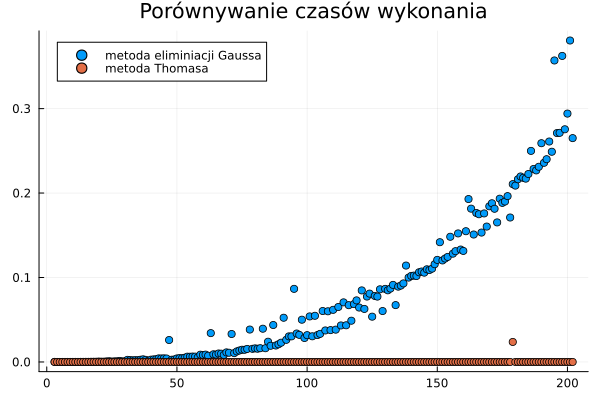

In [106]:
using Plots

x = collect(3:202)
scatter(x, T_M, label=["metoda eliminiacji Gaussa" "metoda Thomasa"], title="Porównywanie czasów wykonania")
# savefig("Porównywanie")

In [115]:
using PrettyTables

pretty_table(T_M)

┌─────────────┬───────────┐
│      Col. 1 │    Col. 2 │
├─────────────┼───────────┤
│ 0.000133766 │  4.101e-6 │
│    6.369e-5 │    9.0e-7 │
│   5.4554e-5 │   6.38e-7 │
│   6.0124e-5 │   7.77e-7 │
│   7.1949e-5 │   7.84e-7 │
│   9.0932e-5 │   9.01e-7 │
│   9.0266e-5 │  1.003e-6 │
│ 0.000100733 │   8.75e-7 │
│ 0.000112894 │   7.46e-7 │
│ 0.000109386 │    7.1e-7 │
│ 0.000143487 │  1.159e-6 │
│ 0.000147029 │   7.62e-7 │
│ 0.000180696 │   9.67e-7 │
│ 0.000192826 │  1.272e-6 │
│  0.00024952 │  1.407e-6 │
│ 0.000283154 │  1.704e-6 │
│ 0.000307241 │   1.27e-6 │
│ 0.000510757 │  1.091e-6 │
│ 0.000368476 │  1.098e-6 │
│ 0.000403757 │  1.368e-6 │
│ 0.000663923 │  1.786e-6 │
│  0.00084578 │  2.016e-6 │
│ 0.000501125 │   1.73e-6 │
│ 0.000709968 │  1.879e-6 │
│ 0.000791064 │  1.978e-6 │
│  0.00120806 │  1.271e-6 │
│ 0.000703997 │  1.675e-6 │
│  0.00072395 │  2.014e-6 │
│  0.00251881 │  2.806e-6 │
│  0.00217799 │  3.416e-6 │
│  0.00197347 │  2.509e-6 │
│  0.00212288 │ 1.7226e-5 │
│  0.00205404 │  2.1